In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [17]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\python\Telco-Customer-Churn.csv')

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

customerID-0.0%
gender-0.0%
SeniorCitizen-0.0%
Partner-0.0%
Dependents-0.0%
tenure-0.0%
PhoneService-0.0%
MultipleLines-0.0%
InternetService-0.0%
OnlineSecurity-0.0%
OnlineBackup-0.0%
DeviceProtection-0.0%
TechSupport-0.0%
StreamingTV-0.0%
StreamingMovies-0.0%
Contract-0.0%
PaperlessBilling-0.0%
PaymentMethod-0.0%
MonthlyCharges-0.0%
TotalCharges-0.0%
Churn-0.0%


In [22]:
# Basic summary statistic
df.describe().style.background_gradient()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
idx = df.loc[df['TotalCharges'] == ' ', :].index
df.drop(idx,axis = 0, inplace = True) 

In [24]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [25]:
df.shape

(7032, 21)

In [27]:
#Churn by gender
gender = df[['gender', 'Churn']]
gender.head()

,gender,Churn
0,Female,No
1,Male,No
2,Male,Yes
3,Male,No
4,Female,Yes


In [30]:
bar = gender.groupby(['gender', 'Churn'])['Churn'].count()
bar = pd.DataFrame(bar)
bar = bar.rename(columns={'Churn': 'counts'})

In [31]:
bar = bar.reset_index()
bar

,gender,Churn,counts
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


In [32]:
bar['counts'] = bar['counts']*100/bar['counts'].sum()

In [33]:
bar1 = bar.loc[bar['gender'] == 'Female', :]
bar2 = bar.loc[bar['gender'] == 'Male', :]

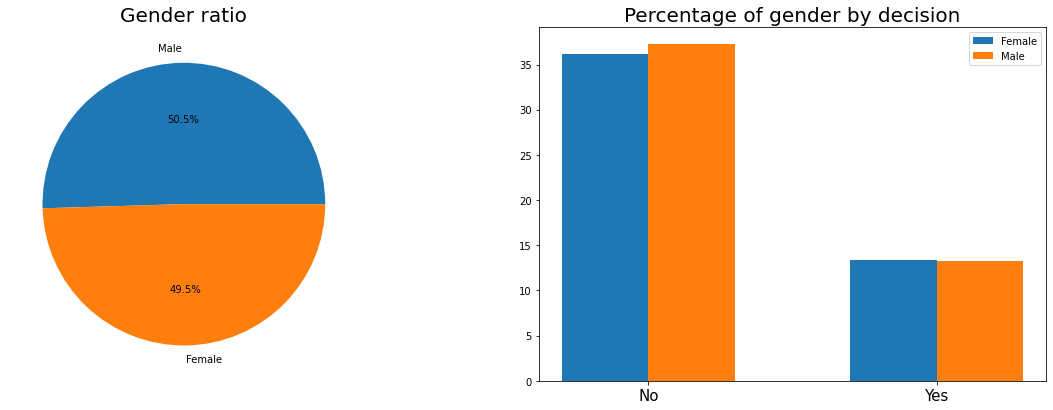

In [34]:
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Gender ratio", fontsize = 20)
plt.pie(gender['gender'].value_counts().values, labels = gender['gender'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)

plt.title("Percentage of gender by decision", fontsize = 20)

x = np.arange(len(bar1['Churn']))

plt.bar(x - width/2, bar1['counts'], width, label = '0')
plt.bar(x + width/2, bar2['counts'], width, label = '1')
plt.xticks([0,1], bar1['Churn'], fontsize = 15)
plt.legend(["Female", "Male"])
plt.show()

In [35]:
bar.style.background_gradient()

,gender,Churn,counts
0,Female,No,36.177474
1,Female,Yes,13.353242
2,Male,No,37.244027
3,Male,Yes,13.225256


In [36]:
#Tenure by churn
Tenure = df[['tenure', 'Churn']]
Tenure.head()

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes


In [37]:
Tenure = Tenure.groupby(['tenure', 'Churn'])['Churn'].count()
Tenure = pd.DataFrame(Tenure)
Tenure = Tenure.rename(columns = {'Churn': 'counts'})

In [38]:
Tenure = Tenure.reset_index()

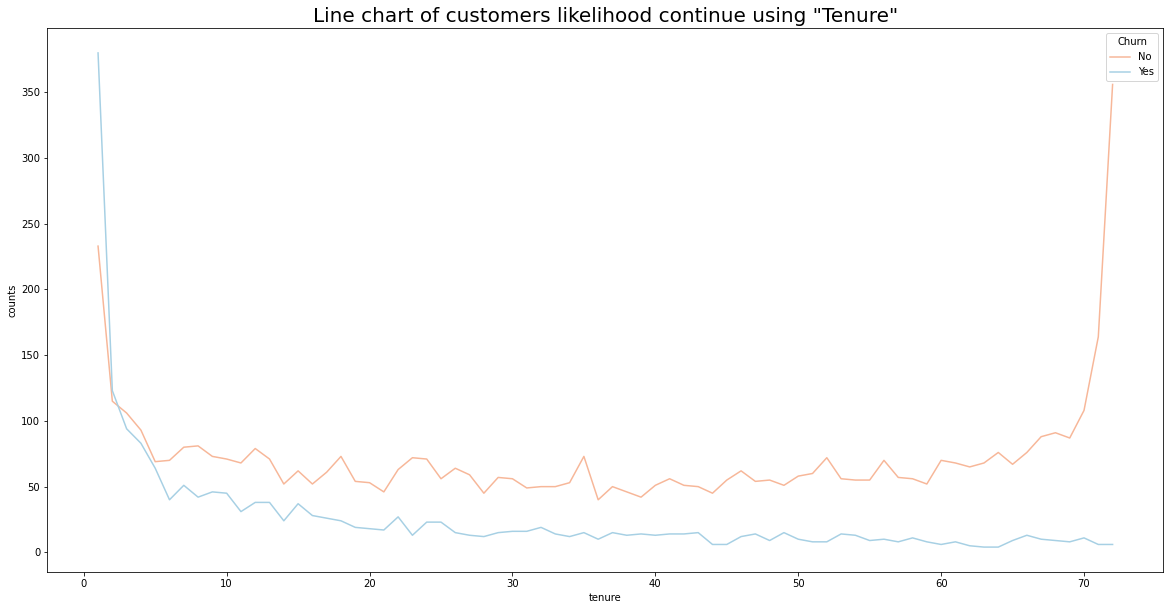

In [48]:
plt.figure(figsize = (20,10))
plt.title('Line chart of customers likelihood continue using "Tenure"', fontsize = 20)
sns.lineplot(data = Tenure, x = 'tenure', y = 'counts', hue = 'Churn', palette='RdBu')
plt.show()

In [53]:
#Senior citizen by churn
SC = df[['SeniorCitizen', 'Churn']]
SC.head()

,SeniorCitizen,Churn
0,0,No
1,0,No
2,0,Yes
3,0,No
4,0,Yes


In [55]:
barSC = SC.groupby(['SeniorCitizen', 'Churn'])['Churn'].count()
barSC = pd.DataFrame(barSC)
barSC = barSC.rename(columns={'Churn': 'counts'})

In [56]:
barSC = barSC.reset_index()
barSC

,SeniorCitizen,Churn,counts
0,0,No,4497
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


In [70]:
barSC1 = barSC.loc[barSC['SeniorCitizen'] ==  0, :]
barSC2 = barSC.loc[barSC['SeniorCitizen'] ==  1, :]
barSC1['counts'] = barSC1['counts']*100/barSC['counts'].sum()
barSC2['counts'] = barSC2['counts']*100/barSC['counts'].sum()

C:\Users\Admin\AppData\Local\Temp/ipykernel_14876/774220279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barSC1['counts'] = barSC1['counts']*100/barSC['counts'].sum()
C:\Users\Admin\AppData\Local\Temp/ipykernel_14876/774220279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barSC2['counts'] = barSC2['counts']*100/barSC['counts'].sum()


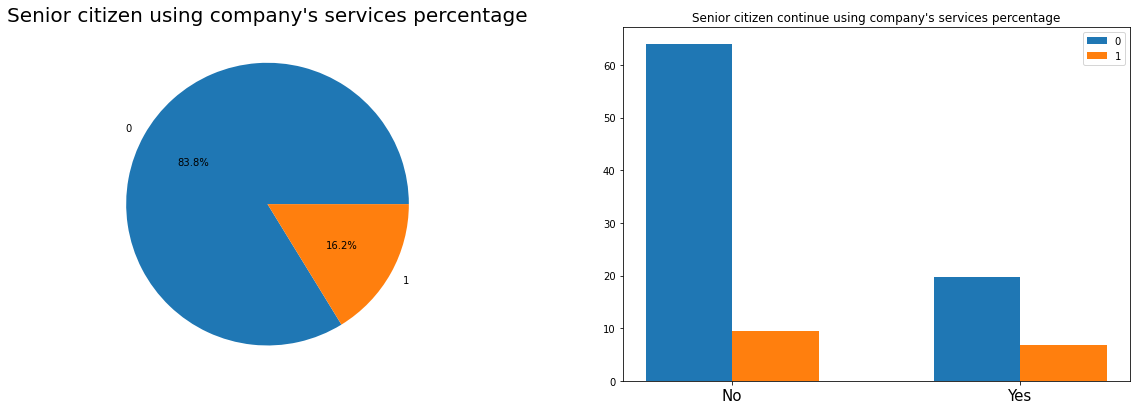

In [60]:
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Senior citizen using company's services percentage", fontsize = 20)
plt.pie(df['SeniorCitizen'].value_counts().values, labels = df['SeniorCitizen'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)

plt.title("Senior citizen continue using company's services percentage")
x = np.arange(len(barSC1['Churn']))

plt.bar(x - width/2, barSC1['counts'], width, label = '0')
plt.bar(x + width/2, barSC2['counts'], width, label = '1')
plt.xticks([0,1], barSC1['Churn'], fontsize = 15)
plt.legend(["0", "1"])
plt.show()

In [61]:
barSeniorCitizen.style.background_gradient()

In [62]:
#Partner by Churn
partner = df[['Partner', 'Churn']]
partner.head()

,Partner,Churn
0,Yes,No
1,No,No
2,No,Yes
3,No,No
4,No,Yes


In [65]:
barpartner = partner.groupby(['Partner', 'Churn'])['Churn'].count()
barpartner = pd.DataFrame(barpartner)
barpartner = barpartner.rename(columns={'Churn': 'counts'})
barpartner = barpartner.reset_index()

In [68]:
barpartner1 = barpartner.loc[barpartner['Partner'] == 'Yes', :]
barpartner2 = barpartner.loc[barpartner['Partner'] == 'No', :]
barpartner1['counts'] = barpartner1['counts']*100/barpartner1['counts'].sum()
barpartner2['counts'] = barpartner2['counts']*100/barpartner2['counts'].sum() 

C:\Users\Admin\AppData\Local\Temp/ipykernel_14876/2756118774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barpartner1['counts'] = barpartner1['counts']*100/barpartner1['counts'].sum()
C:\Users\Admin\AppData\Local\Temp/ipykernel_14876/2756118774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barpartner2['counts'] = barpartner2['counts']*100/barpartner2['counts'].sum()


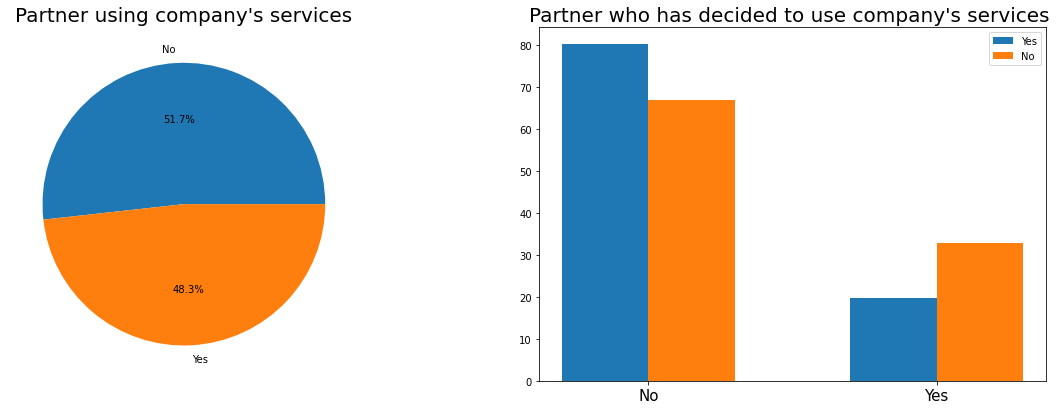

In [77]:
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Partner using company's services", fontsize = 20)
plt.pie(df['Partner'].value_counts().values, labels = df['Partner'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
x = np.arange(len(barpartner1['Churn']))
plt.title("Partner who has decided to use company's services ", fontsize = 20)
plt.bar(x - width/2, barpartner1['counts'], width, label = '0')
plt.bar(x + width/2, barpartner2['counts'], width, label = '1')
plt.xticks([0,1], barpartner1['Churn'], fontsize = 15)
plt.legend(["Yes", "No"])
plt.show()

In [71]:
#Dependent by Churn
Dependents = df[['Dependents', 'Churn']]
Dependents.head()

,Dependents,Churn
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,Yes


In [74]:
barDependents = Dependents.groupby(['Dependents', 'Churn'])['Churn'].count()
barDependents = pd.DataFrame(barDependents)
barDependents = barDependents.rename(columns={'Churn': 'counts'})
barDependents = barDependents.reset_index()

In [75]:
barDependents1 = barDependents.loc[barDependents['Dependents'] == 'Yes', :]
barDependents2 = barDependents.loc[barDependents['Dependents'] == 'No', :]
barDependents1['counts'] = barDependents1['counts']*100/barDependents1['counts'].sum()
barDependents2['counts'] = barDependents2['counts']*100/barDependents2['counts'].sum()

C:\Users\Admin\AppData\Local\Temp/ipykernel_14876/626434464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barDependents1['counts'] = barDependents1['counts']*100/barDependents1['counts'].sum()
C:\Users\Admin\AppData\Local\Temp/ipykernel_14876/626434464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barDependents2['counts'] = barDependents2['counts']*100/barDependents2['counts'].sum()


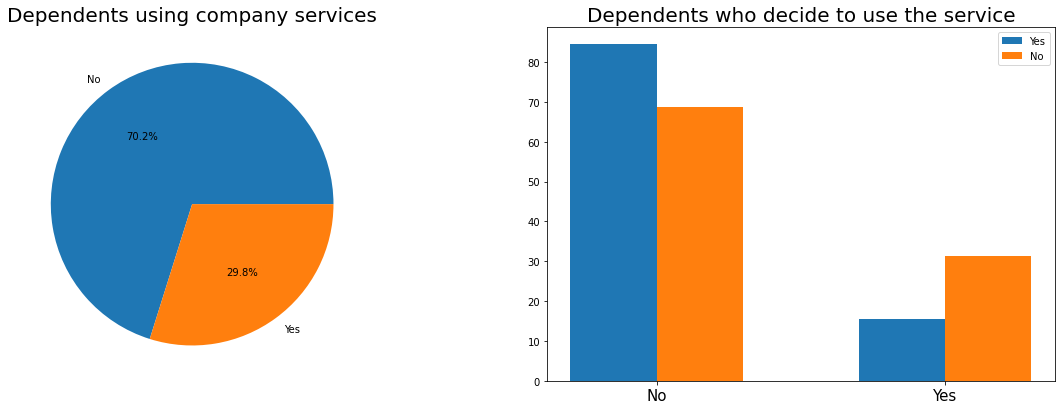

In [78]:
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Dependents using company services", fontsize = 20)
plt.pie(df['Dependents'].value_counts().values, labels = df['Dependents'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
x = np.arange(len(barDependents1['Churn']))
plt.title("Dependents who decide to use the service", fontsize = 20)
plt.bar(x - width/2, barDependents1['counts'], width, label = 'Yes')
plt.bar(x + width/2, barDependents2['counts'], width, label = 'No')
plt.xticks([0,1], barDependents2['Churn'], fontsize = 15)
plt.legend(["Yes", "No"])
plt.show()

In [79]:
#phoneService by Churn
phoneSerivce = df[['PhoneService', 'MultipleLines', 'Churn']]
phoneSerivce = phoneSerivce.groupby(['PhoneService','MultipleLines', 'Churn'])['Churn'].count()
phoneSerivce = pd.DataFrame(phoneSerivce)
phoneSerivce = phoneSerivce.rename(columns = {'Churn': 'Counts'})

In [80]:
phoneSerivce = phoneSerivce.reset_index()

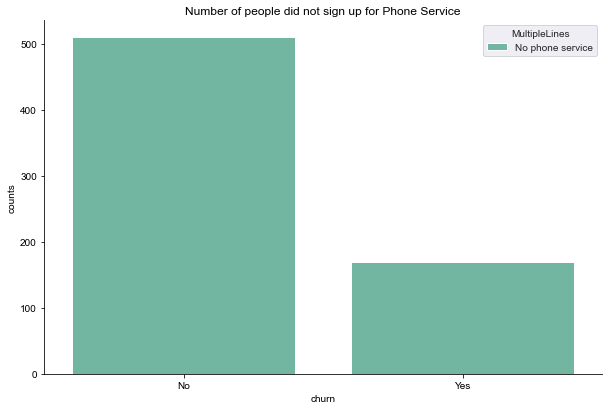

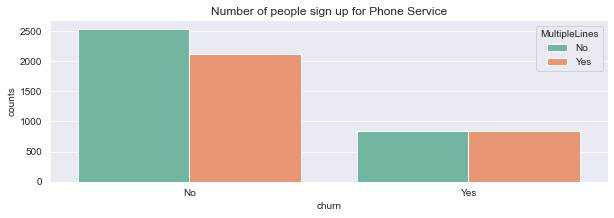

In [81]:
fig = plt.figure(figsize = (10,6.5))
plt.subplot(111)
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data=phoneSerivce.loc[phoneSerivce['PhoneService'] == 'No', :], x="Churn", y="Counts", hue = 'MultipleLines')
plt.title('Number of people did not sign up for Phone Service')
plt.xlabel('churn')
plt.ylabel('counts')
sns.despine()
plt.show()

fig = plt.figure(figsize = (10,6.5))
plt.subplot(211)
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data=phoneSerivce.loc[phoneSerivce['PhoneService'] == 'Yes', :], x="Churn", y="Counts", hue = 'MultipleLines')
plt.title('Number of people sign up for Phone Service')
plt.xlabel('churn')
plt.ylabel('counts')
sns.despine()
plt.show()

In [83]:
phoneSerivce.style.background_gradient()

,PhoneService,MultipleLines,Churn,Counts
0,No,No phone service,No,510
1,No,No phone service,Yes,170
2,Yes,No,No,2536
3,Yes,No,Yes,849
4,Yes,Yes,No,2117
5,Yes,Yes,Yes,850


In [89]:
#InternetService: by Churn
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [90]:
internetService = df[['InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']]

<AxesSubplot:xlabel='StreamingMovies', ylabel='Count'>

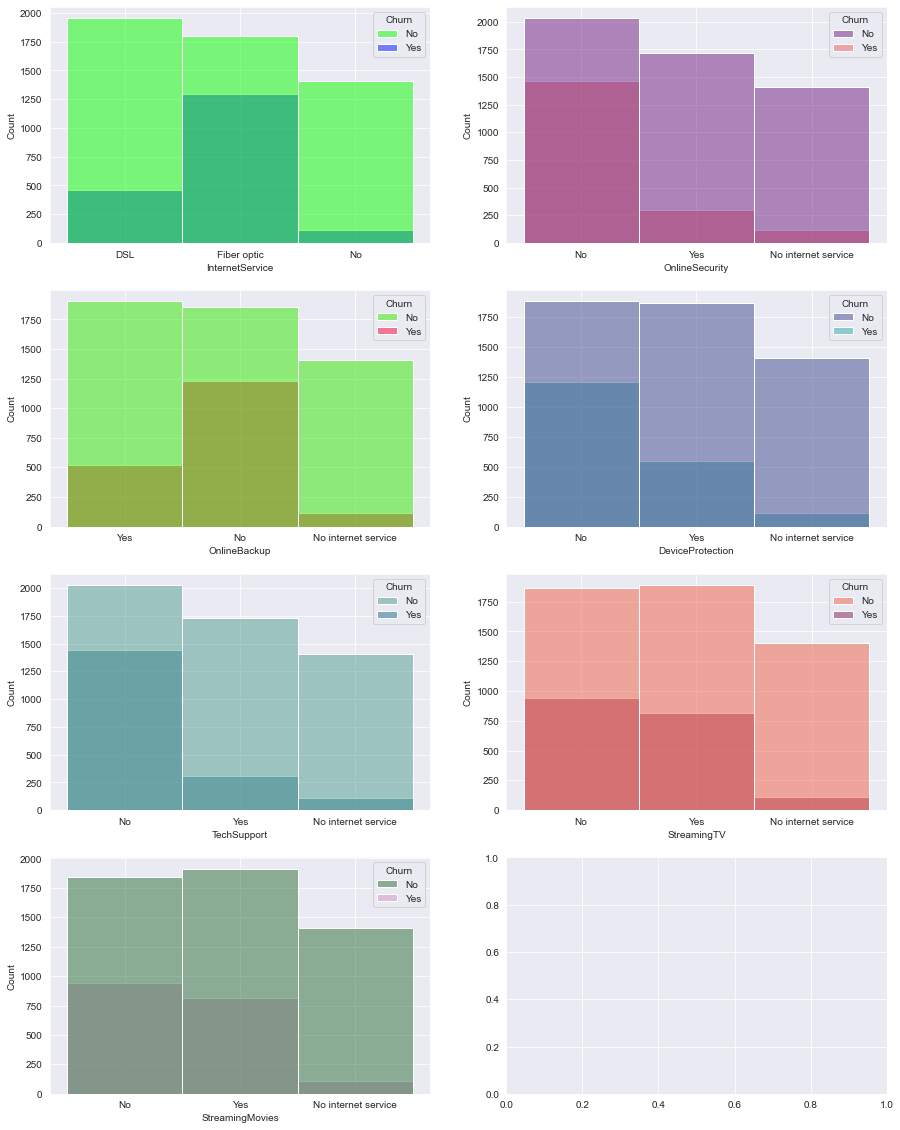

In [91]:
fig, ax = plt.subplots(4, 2,figsize=(15,20))
sns.histplot(data=internetService,x="InternetService",hue='Churn', palette='hsv',ax=ax[0,0])
sns.histplot(data=internetService,x="OnlineSecurity",hue='Churn', palette='magma',ax=ax[0,1])
sns.histplot(data=internetService,x="OnlineBackup",hue='Churn', palette='prism',ax=ax[1,0])
sns.histplot(data=internetService,x='DeviceProtection',hue='Churn', palette='mako',ax=ax[1,1])
sns.histplot(data=internetService,x='TechSupport',hue='Churn', palette='crest',ax=ax[2,0])
sns.histplot(data=internetService,x='StreamingTV',hue='Churn', palette='rocket_r',ax=ax[2,1])
sns.histplot(data=internetService,x='StreamingMovies',hue='Churn', palette='cubehelix',ax=ax[3,0])

In [92]:
#Payment by Churn

In [93]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [94]:
payment = df[['Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
payment

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,One year,No,Mailed check,56.95,1889.50,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84.80,1990.50,No
7039,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


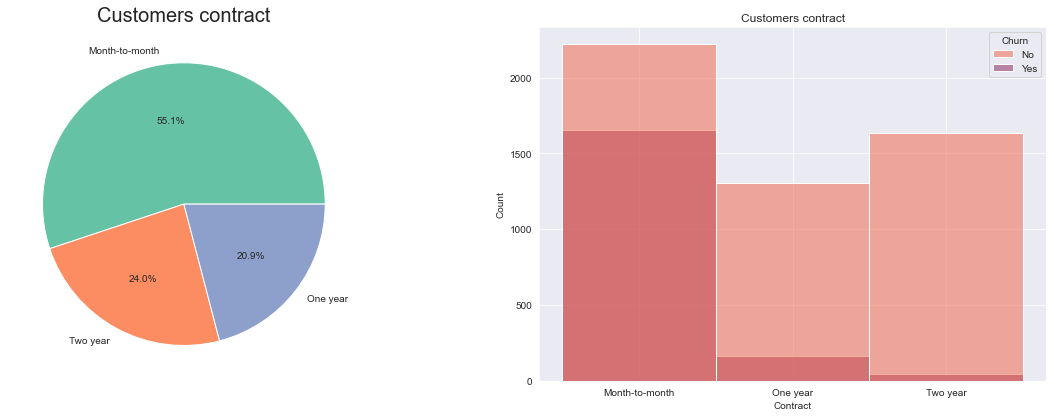

In [98]:
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Customers contract", fontsize = 20)
plt.pie(payment['Contract'].value_counts().values, labels = payment['Contract'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
plt.title("Customers contract")
sns.histplot(data=payment,x='Contract',hue='Churn', palette='rocket_r')
plt.show()

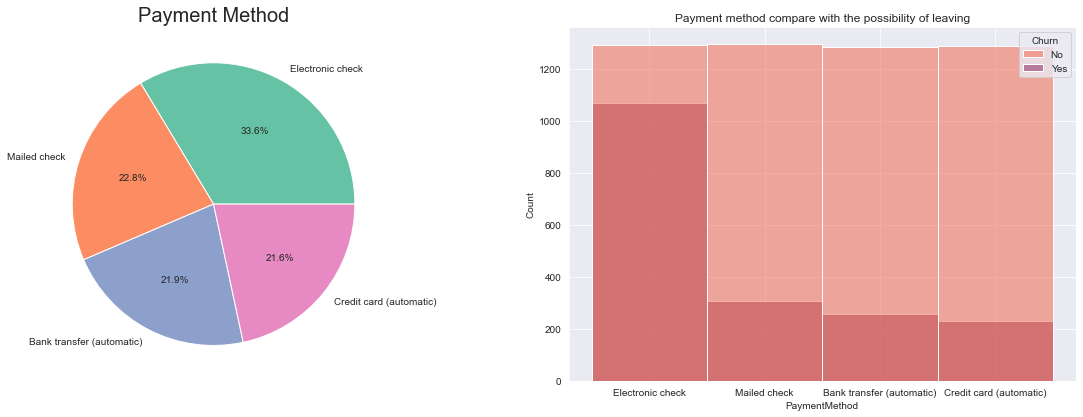

In [100]:
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Payment Method", fontsize = 20)
plt.pie(payment['PaymentMethod'].value_counts().values, labels = payment['PaymentMethod'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
plt.title("Payment method compare with the possibility of leaving")
sns.histplot(data=payment,x='PaymentMethod',hue='Churn', palette='rocket_r')
plt.show()

In [101]:
#Building forecast model
df = df.drop('customerID', axis=1)

In [102]:
df1 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']]
dataHeap = df1.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
obj = dataHeap.select_dtypes("object").columns

In [103]:
def convertStringToNumber(name, df, data):
    for n in name:
        x = df[n].unique()
        for i in range(len(x)):
            data[n] = data[n].replace(to_replace=x[i], value=i)

In [104]:
convertStringToNumber(obj, dataHeap, df1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_14876/3390505452.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


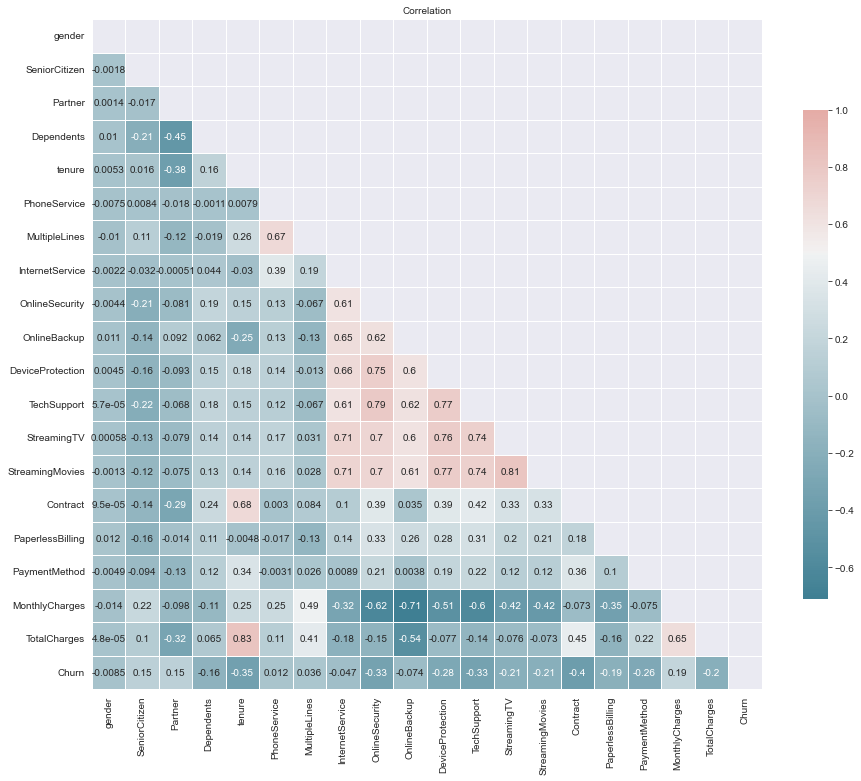

In [106]:
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)
plt.show()

In [107]:
x = df1.drop("Churn", axis = 1)
y = df1['Churn']

In [111]:
rfe = RFE(estimator= DecisionTreeClassifier(), n_features_to_select= 5)

In [112]:
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [113]:
for i, col in zip(range(x.shape[1]), x.columns):
  print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

gender selected = False rank = 3
SeniorCitizen selected = False rank = 11
Partner selected = False rank = 12
Dependents selected = False rank = 8
tenure selected = True rank = 1
PhoneService selected = False rank = 15
MultipleLines selected = False rank = 9
InternetService selected = False rank = 5
OnlineSecurity selected = True rank = 1
OnlineBackup selected = False rank = 7
DeviceProtection selected = False rank = 6
TechSupport selected = False rank = 10
StreamingTV selected = False rank = 14
StreamingMovies selected = False rank = 13
Contract selected = True rank = 1
PaperlessBilling selected = False rank = 4
PaymentMethod selected = False rank = 2
MonthlyCharges selected = True rank = 1
TotalCharges selected = True rank = 1


In [114]:
X = df1[['TotalCharges', 'MonthlyCharges', 'OnlineSecurity', 'tenure', 'Contract']]
y = df1['Churn']

In [120]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

(5625, 5) (1407, 5) (5625,) (1407,)


In [123]:
knn = KNeighborsClassifier(n_neighbors= 15)

In [124]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [125]:
pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, pred_knn))

0.7889125799573561


              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.66      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



<AxesSubplot:>

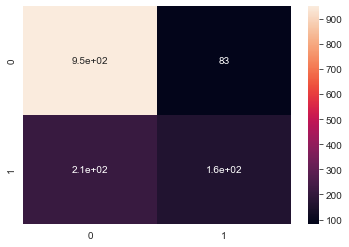

In [126]:
print(classification_report(y_test,pred_knn))

confusion_knn=confusion_matrix(y_test,pred_knn)
sns.heatmap(confusion_knn,annot=True)